In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# input folder
from pathlib import Path
Path('/kaggle/working/oral-diseases/').mkdir(parents=True, exist_ok=True)

In [3]:
import shutil
import os

# Caries.
# The source path
caries_file_path = Path('/kaggle/input/oral-diseases/Data caries/Data caries/caries augmented data set/preview')

# The destination path
caries_new_directory = Path('/kaggle/working/oral-diseases/caries')

# Copying data from input folder to working folder
shutil.copytree(caries_file_path, caries_new_directory)

PosixPath('/kaggle/working/oral-diseases/caries')

In [4]:
# Calculus
# The source path
calculus_file_path = Path('/kaggle/input/oral-diseases/Calculus/Calculus')
# The destination path
calculus_new_directory = Path('/kaggle/working/oral-diseases/calculus')
# Copying data from input folder to working folder
shutil.copytree(calculus_file_path, calculus_new_directory)

#Gingivitis
# The source path
gingivitis_file_path = Path('/kaggle/input/oral-diseases/Gingivitis/Gingivitis')
# The destination path
gingivitis_new_directory = Path('/kaggle/working/oral-diseases/gingivitis')
# Copying data from input folder to working folder
shutil.copytree(gingivitis_file_path, gingivitis_new_directory)

#Ulcers
# The source path
ulcer_file_path = Path('/kaggle/input/oral-diseases/Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview')
# The destination path
ulcer_new_directory = Path('/kaggle/working/oral-diseases/ulcers')
# Copying data from input folder to working folder
shutil.copytree(ulcer_file_path, ulcer_new_directory)

#Tooth Discoloration
# The source path
toothDiscoloration_file_path = Path('/kaggle/input/oral-diseases/Tooth Discoloration/Tooth Discoloration /Tooth_discoloration_augmented_dataser/preview')
# The destination path
toothDiscoloration_new_directory = Path('/kaggle/working/oral-diseases/toothDiscoloration')
# Copying data from input folder to working folder
shutil.copytree(toothDiscoloration_file_path, toothDiscoloration_new_directory)

#hypodontia
# The source path
hypodontia_file_path = Path('/kaggle/input/oral-diseases/hypodontia/hypodontia')
# The destination path
hypodontia_new_directory = Path('/kaggle/working/oral-diseases/hypodontia')
# Copying data from input folder to working folder
shutil.copytree(hypodontia_file_path, hypodontia_new_directory)

PosixPath('/kaggle/working/oral-diseases/hypodontia')

In [5]:
# The different classes we have from the folders
import os
build_dir = "/kaggle/working/oral-diseases"
caries_dir = os.path.join(build_dir,'caries')
gingivitis_dir = os.path.join(build_dir,'gingivitis')
toothDiscoloration_dir = os.path.join(build_dir,'toothDiscoloration')
ulcers_dir = os.path.join(build_dir,'ulcers')
hypodontia_dir = os.path.join(build_dir,'hypodontia')
calculus_dir = os.path.join(build_dir,'calculus')
os.listdir(build_dir)

['caries',
 'ulcers',
 'gingivitis',
 'calculus',
 'hypodontia',
 'toothDiscoloration']

In [6]:
# Showing the total number of images from each class/folder
import pandas as pd

data = pd.DataFrame(data=[len(os.listdir(caries_dir)), len(os.listdir(gingivitis_dir)),
                   len(os.listdir(toothDiscoloration_dir)), len(os.listdir(ulcers_dir)),
                   len(os.listdir(hypodontia_dir)),
                   len(os.listdir(calculus_dir))], index=['Caries', 'Gingivitis',
                                                                    'toothDiscoloration', 'ulcers',
                                                                    'hypodontia', 'calculus'],
              columns=['Total Images'])

In [7]:
data.to_csv('data_distribution.csv')

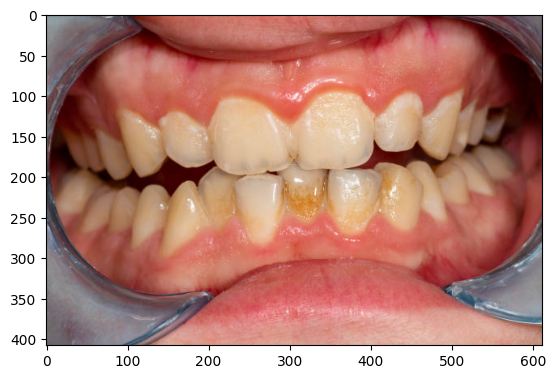

In [8]:
# Sample of caries
from PIL import Image
import matplotlib.pyplot as plt
cariesimg=Image.open("/kaggle/working/oral-diseases/calculus/(10).jpg")
plt.imshow(cariesimg)

In [9]:
categories = data.index
categories

values = data['Total Images']

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


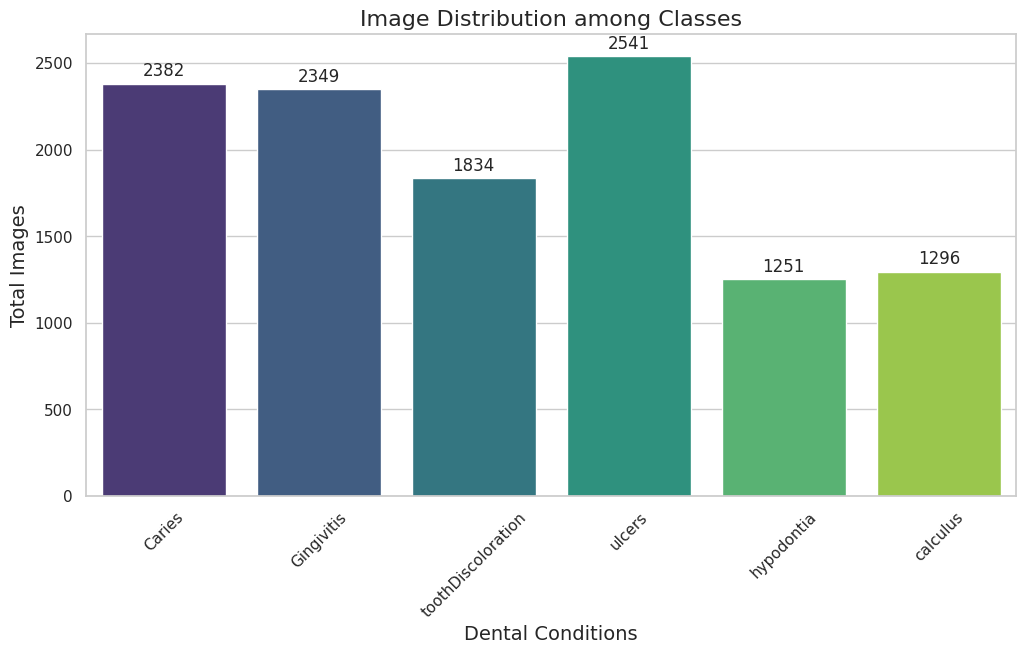

In [10]:
import seaborn as sns

# Improved 2D bar plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating the barplot
barplot = sns.barplot(x=categories, y=values, palette="viridis")

# Adding the text on the top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

# Setting titles and labels
plt.xlabel("Dental Conditions", fontsize=14)
plt.ylabel("Total Images", fontsize=14)
plt.title("Image Distribution among Classes", fontsize=16)
plt.xticks(rotation=45)
plt.savefig('imageDistribution.png')
plt.show()


In [11]:
### Importing necessary libraries
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import (VGG16, VGG19, ResNet50, InceptionV3, MobileNetV2,
                                DenseNet121, Xception)
from keras.applications.efficientnet import (EfficientNetB0, EfficientNetB1, EfficientNetB2,
                                             EfficientNetB3, EfficientNetB4, EfficientNetB5,
                                             EfficientNetB6, EfficientNetB7, preprocess_input as efficientnet_preprocess_input)
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from keras.applications.inception_v3 import preprocess_input as inceptionv3_preprocess_input
from keras.applications.mobilenet_v2 import preprocess_input as mobilenetv2_preprocess_input
from keras.applications.densenet import preprocess_input as densenet_preprocess_input
from keras.applications.xception import preprocess_input as xception_preprocess_input
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.layers import BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [12]:
# Constants
DATA_DIR = "/kaggle/working/oral-diseases"

In [13]:
# Model configurations
num_classes = 6
batch_size = 32
epochs = 100

In [14]:
# Map model names to their function, preprocess_input, and input_shape
model_info = {
#     'VGG16': (VGG16, vgg16_preprocess_input, (224, 224, 3)),
#     'VGG19': (VGG19, vgg19_preprocess_input, (224, 224, 3)),
#     'ResNet50': (ResNet50, resnet50_preprocess_input, (224, 224, 3)),
#     'InceptionV3': (InceptionV3, inceptionv3_preprocess_input, (299, 299, 3)),
#     'MobileNetV2': (MobileNetV2, mobilenetv2_preprocess_input, (224, 224, 3)),
#     'DenseNet121': (DenseNet121, densenet_preprocess_input, (224, 224, 3)),
#     'Xception': (Xception, xception_preprocess_input, (299, 299, 3)),
    'EfficientNetB0': (EfficientNetB0, efficientnet_preprocess_input, (224, 224, 3)),
    'EfficientNetB1': (EfficientNetB1, efficientnet_preprocess_input, (240, 240, 3)),
#     'EfficientNetB2': (EfficientNetB2, efficientnet_preprocess_input, (260, 260, 3)),
#     'EfficientNetB3': (EfficientNetB3, efficientnet_preprocess_input, (224, 224, 3)),
#     'EfficientNetB4': (EfficientNetB4, efficientnet_preprocess_input, (224, 224, 3)),
#     'EfficientNetB5': (EfficientNetB5, efficientnet_preprocess_input, (224, 224, 3)),
#     'EfficientNetB6': (EfficientNetB6, efficientnet_preprocess_input, (224, 224, 3)),
#     'EfficientNetB7': (EfficientNetB7, efficientnet_preprocess_input, (224, 224, 3))
}

In [15]:
def train_model(model_name, num_classes, data_dir, epochs, batch_size):
    model_class, preprocess_input, input_shape = model_info[model_name]

    # Load and preprocess the data using tf.data
    train_dataset = image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=input_shape[:2],
        batch_size=batch_size,
        label_mode='categorical',
        color_mode = 'rgb',
    )

    validation_dataset = image_dataset_from_directory(
        data_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=input_shape[:2],
        batch_size=batch_size,
        label_mode='categorical',
        color_mode = 'rgb',
    )

    # Define the image augmentation layer
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
        tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1)
    ])

    # Apply augmentation and preprocessing only to the training dataset
    train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
    train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))

    # Apply only preprocessing to the validation dataset
    validation_dataset = validation_dataset.map(lambda x, y: (preprocess_input(x), y))

    # AUTOTUNE
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
    validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)


    # Model creation
    base_model = model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Compile the model
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=METRICS)
    
    
    # Define Callbacks
    checkpoint = ModelCheckpoint(filepath=f'{model_name}_model.h5',
                                 monitor='val_accuracy',
                                 mode='max',
                                 save_best_only=True,
                                 verbose=1)

    earlystop = EarlyStopping(monitor='val_accuracy',
                              min_delta=0.001,
                              patience=15,
                              restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                  factor=0.1,
                                  patience=10,
                                  verbose=1,
                                  min_delta=0.0001,
                                  min_lr=0.0001)

    callbacks = [checkpoint, earlystop, reduce_lr]
    
    # Train the model
    history = model.fit(
        train_dataset,
        epochs=epochs,
        validation_data=validation_dataset,
        callbacks=callbacks
    )
    
    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Save the plot
    plt.savefig(f'{model_name}_accuracy_loss_plot.png')
    plt.close()
    
    fig, ax = plt.subplots(2,2 , figsize=(8, 10))
    ax = ax.ravel()

    for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['train', 'val'])
    fig.savefig(f'{model_name}_metrics.png')
    
    print(f"{model_name}_performance...")
    loss, accuracy, precision, recall = model.evaluate(validation_dataset)
    print(f"Validation Loss: {loss}")
    print(f"Validation Accuracy: {accuracy}")
    print(f"Validation Precision: {precision}")
    print(f"Validation Recall: {recall}")
    
    val_dataset = validation_dataset.unbatch().batch(1)
    true_labels = []
    predictions = []
    for x, y in val_dataset:
        true_labels.append(np.argmax(y.numpy(), axis=1))
        predictions.append(np.argmax(model.predict(x), axis=1))

    true_labels = np.concatenate(true_labels)
    predictions = np.concatenate(predictions)

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['caries', 'gingivitis', 'toothDiscoloration', 'ulcers', 'hypodontia', 'calculus'],yticklabels=['caries', 'gingivitis', 'toothDiscoloration', 'ulcers', 'hypodontia', 'calculus'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.savefig(f'{model_name}_confusion_matrix.png')

    # Metrics
    print(f"{model_name}_performance Metrics...")
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1score = f1_score(true_labels, predictions, average='weighted')
    
    print("accuracy", accuracy)
    print("precision", precision)
    print("recall", recall)
    print("f1-score", f1score)

    # Save metrics to CSV file
    csv_file = 'model_results.csv'
    new_row = pd.DataFrame([[model_name, accuracy, precision, recall, f1score]], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    if not os.path.exists(csv_file):
        new_row.to_csv(csv_file, index=False)
    else:
        pd.concat([pd.read_csv(csv_file), new_row]).to_csv(csv_file, index=False)
    
    return model

Training EfficientNetB0...
Found 11653 files belonging to 6 classes.
Using 9323 files for training.
Found 11653 files belonging to 6 classes.
Using 2330 files for validation.
16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/100


2024-01-05 05:28:35.767899: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


292/292 [==============================] - ETA: 0s - loss: 1.4842 - accuracy: 0.5973 - precision: 0.6348 - recall: 0.5518
Epoch 1: val_accuracy improved from -inf to 0.80558, saving model to EfficientNetB0_model.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


292/292 [==============================] - 220s 590ms/step - loss: 1.4842 - accuracy: 0.5973 - precision: 0.6348 - recall: 0.5518 - val_loss: 0.5606 - val_accuracy: 0.8056 - val_precision: 0.8509 - val_recall: 0.7395 - lr: 0.0010
Epoch 2/100
292/292 [==============================] - ETA: 0s - loss: 0.5585 - accuracy: 0.7943 - precision: 0.8244 - recall: 0.7546
Epoch 2: val_accuracy did not improve from 0.80558
292/292 [==============================] - 82s 282ms/step - loss: 0.5585 - accuracy: 0.7943 - precision: 0.8244 - recall: 0.7546 - val_loss: 0.9994 - val_accuracy: 0.7227 - val_precision: 0.7541 - val_recall: 0.6751 - lr: 0.0010
Epoch 3/100
292/292 [==============================] - ETA: 0s - loss: 0.4762 - accuracy: 0.8311 - precision: 0.8612 - recall: 0.7975
Epoch 3: val_accuracy improved from 0.80558 to 0.81245, saving model to EfficientNetB0_model.h5
292/292 [==============================] - 86s 294ms/step - loss: 0.4762 - accuracy: 0.8311 - precision: 0.8612 - recall: 0.79

2024-01-05 06:45:12.953211: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


292/292 [==============================] - ETA: 0s - loss: 1.7446 - accuracy: 0.5695 - precision: 0.6042 - recall: 0.5205
Epoch 1: val_accuracy improved from -inf to 0.73863, saving model to EfficientNetB1_model.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


292/292 [==============================] - 293s 805ms/step - loss: 1.7446 - accuracy: 0.5695 - precision: 0.6042 - recall: 0.5205 - val_loss: 0.7753 - val_accuracy: 0.7386 - val_precision: 0.8259 - val_recall: 0.6270 - lr: 0.0010
Epoch 2/100
292/292 [==============================] - ETA: 0s - loss: 0.6398 - accuracy: 0.7620 - precision: 0.7997 - recall: 0.7146
Epoch 2: val_accuracy improved from 0.73863 to 0.80386, saving model to EfficientNetB1_model.h5
292/292 [==============================] - 136s 464ms/step - loss: 0.6398 - accuracy: 0.7620 - precision: 0.7997 - recall: 0.7146 - val_loss: 0.4951 - val_accuracy: 0.8039 - val_precision: 0.8301 - val_recall: 0.7425 - lr: 0.0010
Epoch 3/100
292/292 [==============================] - ETA: 0s - loss: 0.5098 - accuracy: 0.8214 - precision: 0.8466 - recall: 0.7861
Epoch 3: val_accuracy improved from 0.80386 to 0.82918, saving model to EfficientNetB1_model.h5
292/292 [==============================] - 136s 465ms/step - loss: 0.5098 - accu

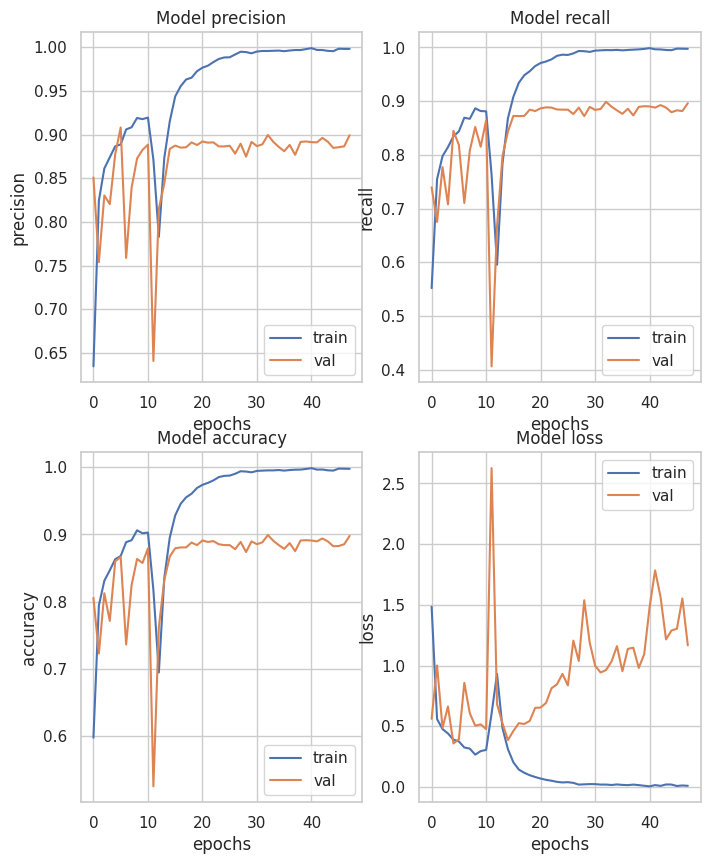

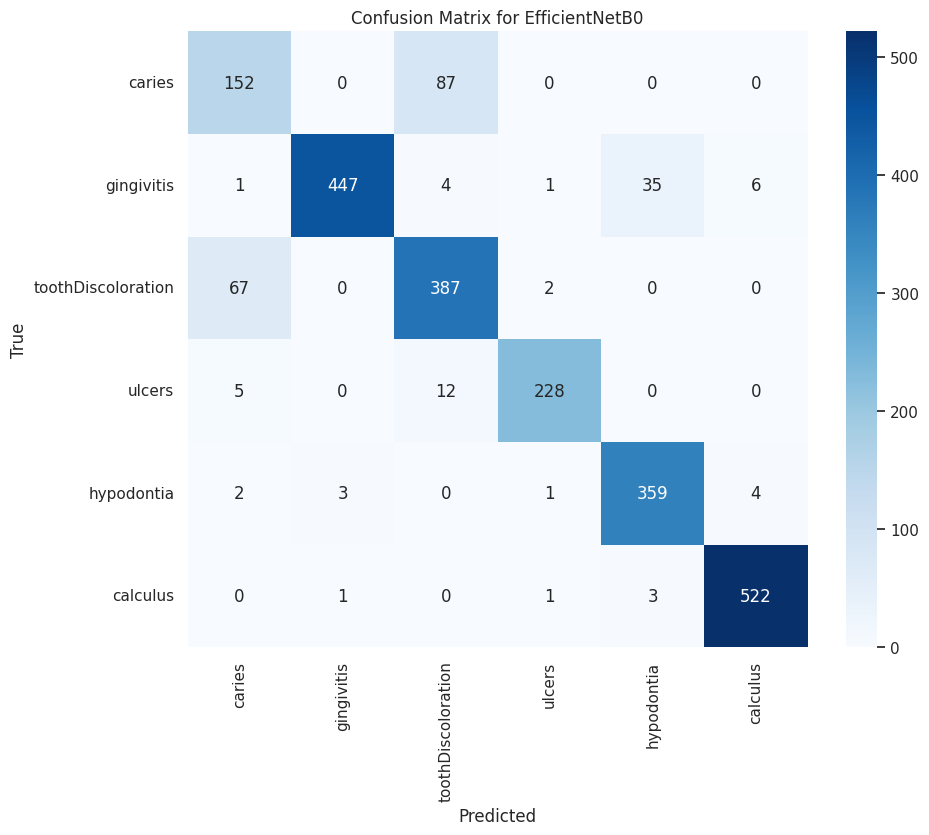

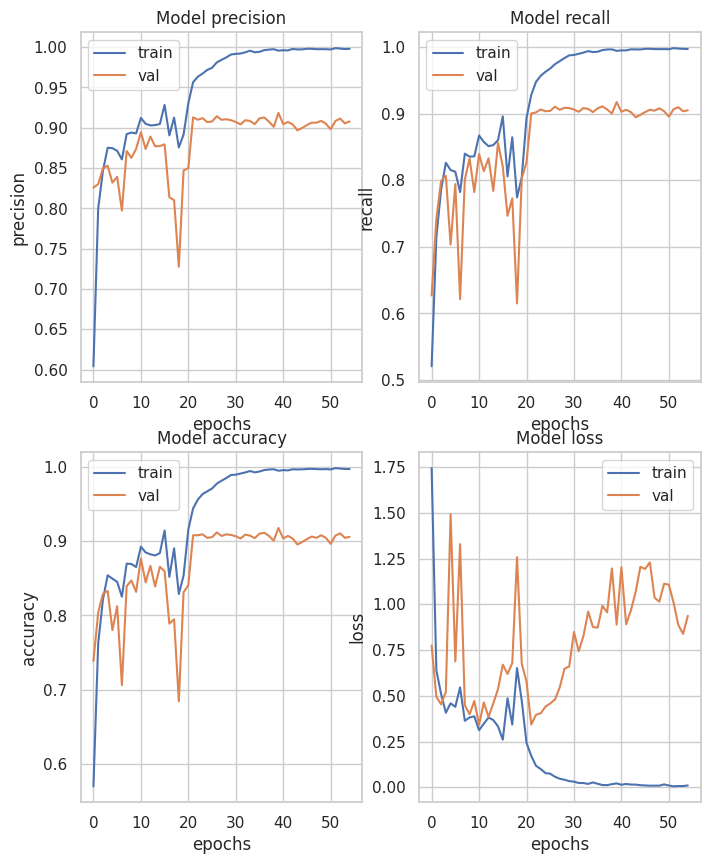

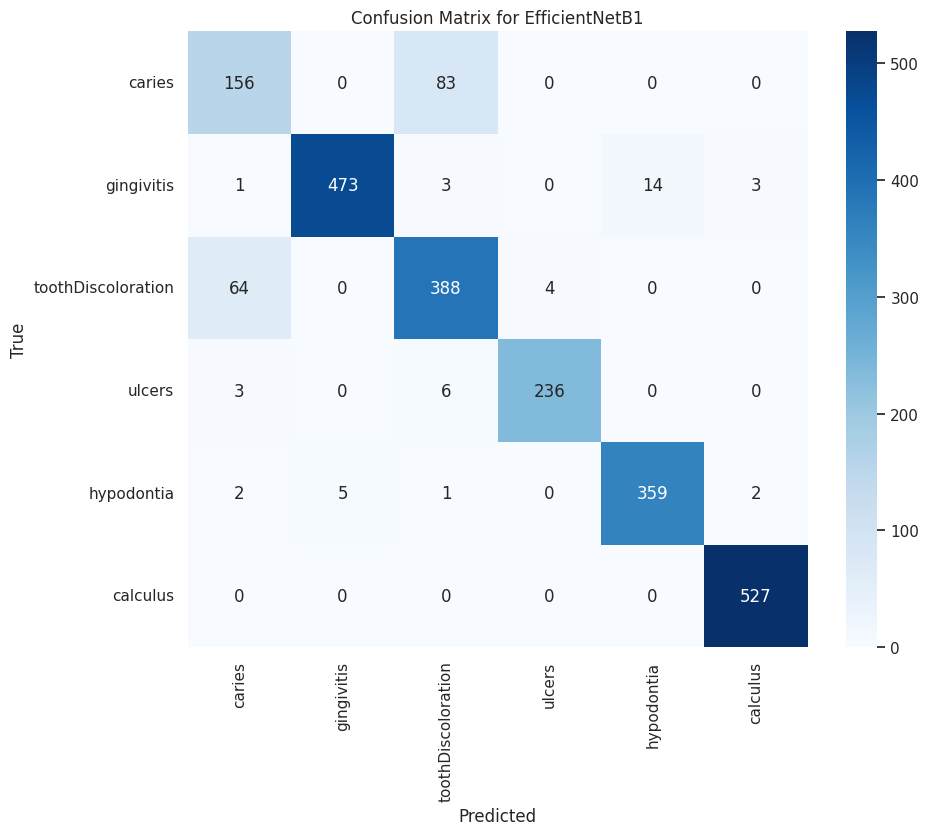

In [16]:
# Train and save each model
for model_name in model_info.keys():
    print(f"Training {model_name}...")
    model = train_model(model_name, num_classes, DATA_DIR, epochs, batch_size)
#     model.save(f'{model_name}_model.h5')
    print(f"{model_name} model training completed and saved.")
    print("=============================================================================")